/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1UVflZ_7xLywAEVWK50PYz6hxXjjidWGu
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 155MB/s]


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
df=pd.read_csv("/content/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df["label"].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

<ipython-input-63-8a0888dcd5a1>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["label"], bins=20, color='skyblue', kde=False, palette=palette)


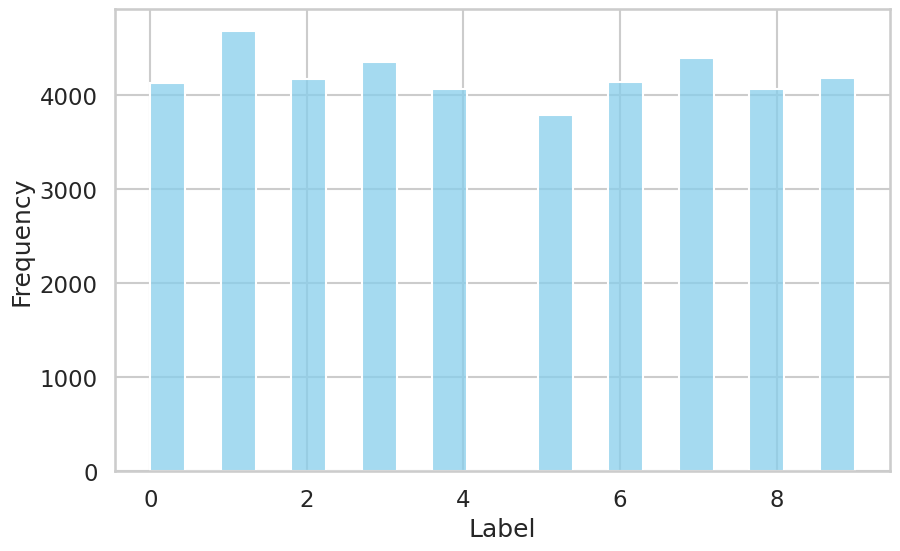

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk")
palette = sns.color_palette("hls", 10)
plt.figure(figsize=(10,6))
sns.histplot(df["label"], bins=20, color='skyblue', kde=False, palette=palette)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

<ipython-input-64-ee8e620b7a94>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,i+1)


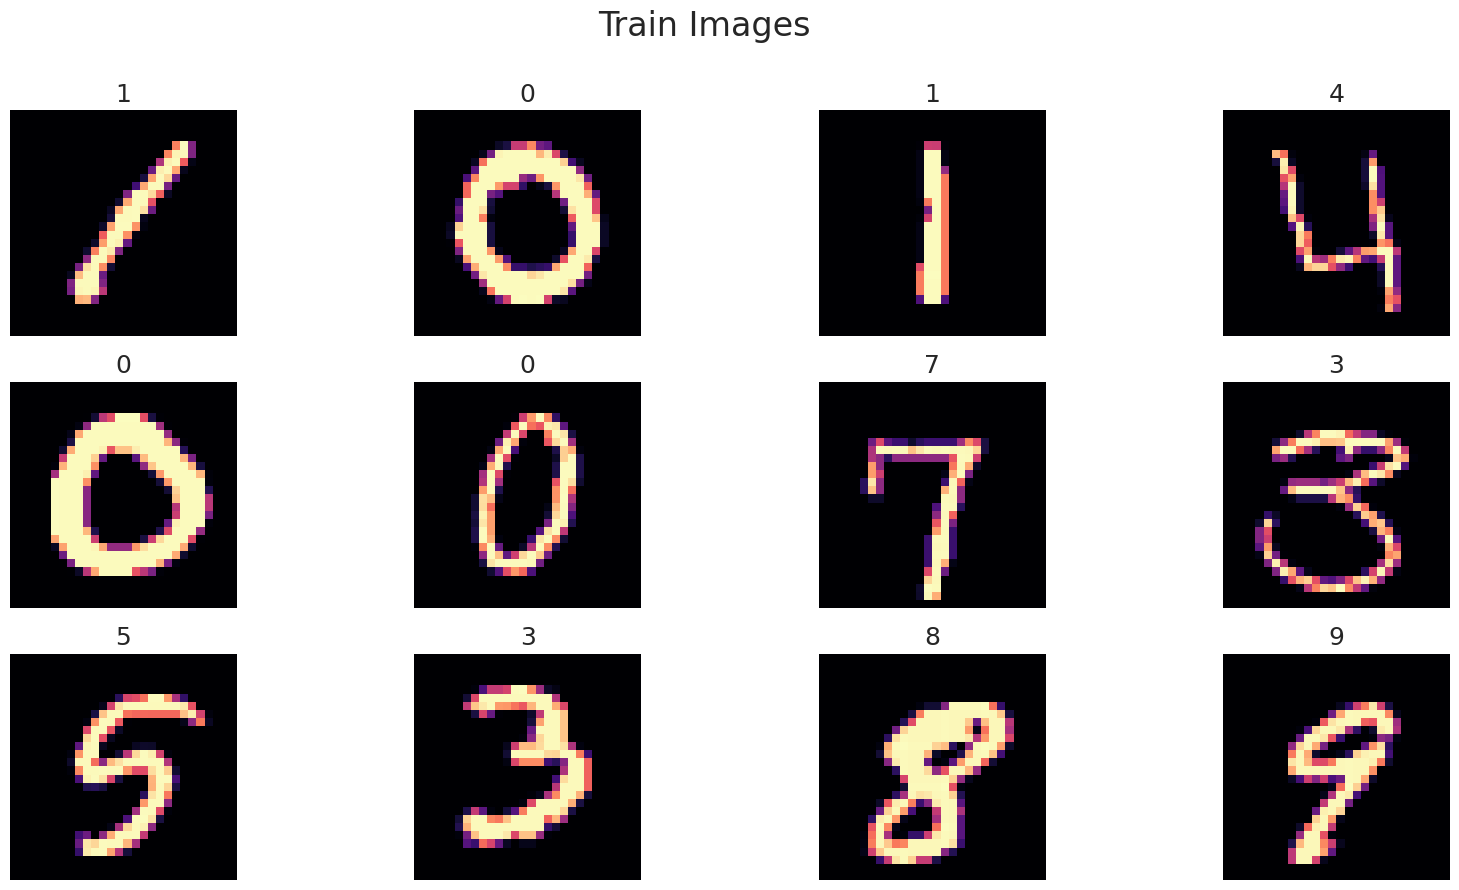

In [ ]:
# Looking for some train dataset image
fig, ax=plt.subplots(figsize=(20,10))
for i ,r in df.iloc[:12, :].iterrows():
  plt.subplot(3,4,i+1)
  plt.title(r[0])
  image=r.to_numpy()[1:].reshape(28,28)
  fig.suptitle("Train Images",fontsize=24)
  plt.axis('off')
  plt.imshow(image,cmap="magma")

In [ ]:
x=df.iloc[:,1:].to_numpy()
y=df["label"].to_numpy()
# Normalize the Data
sx=x/255.0

In [ ]:
# Reshape the dataframe with 3*3 matrix
# -1 adjust this dimension until the array size matches the original.
# 28,28 represent the height and width of the images in pixels.
# 1 represents the number of color channels in the image.
sx = sx.reshape(-1,28,28,1)
# test = test.reshape(-1,28,28,1)

In [ ]:
#  convert Y_train to categorical by one-hot-encoding
y_cat = to_categorical(y, num_classes = 10)
print(y_cat)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
# train validation split
x_train, x_test, y_train, y_test = train_test_split(sx, y_cat, test_size=0.3)

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 15
VERBOSE = 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 11, 11, 64)       

In [ ]:
y_pred= model.fit(sx, y_cat,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
230/230 - 40s - loss: 0.8990 - accuracy: 0.7256 - val_loss: 4.0110 - val_accuracy: 0.1153 - 40s/epoch - 172ms/step
Epoch 2/10
230/230 - 22s - loss: 0.2643 - accuracy: 0.9199 - val_loss: 0.5743 - val_accuracy: 0.8336 - 22s/epoch - 94ms/step
Epoch 3/10
230/230 - 21s - loss: 0.1852 - accuracy: 0.9461 - val_loss: 0.1104 - val_accuracy: 0.9677 - 21s/epoch - 93ms/step
Epoch 4/10
230/230 - 21s - loss: 0.1483 - accuracy: 0.9554 - val_loss: 0.0744 - val_accuracy: 0.9779 - 21s/epoch - 92ms/step
Epoch 5/10
230/230 - 21s - loss: 0.1305 - accuracy: 0.9618 - val_loss: 0.0533 - val_accuracy: 0.9844 - 21s/epoch - 92ms/step
Epoch 6/10
230/230 - 20s - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.0599 - val_accuracy: 0.9823 - 20s/epoch - 89ms/step
Epoch 7/10
230/230 - 25s - loss: 0.1019 - accuracy: 0.9706 - val_loss: 0.0536 - val_accuracy: 0.9839 - 25s/epoch - 108ms/step
Epoch 8/10
230/230 - 34s - loss: 0.0934 - accuracy: 0.9726 - val_loss: 0.0461 - val_accuracy: 0.9866 - 34s/epoch - 148ms/st

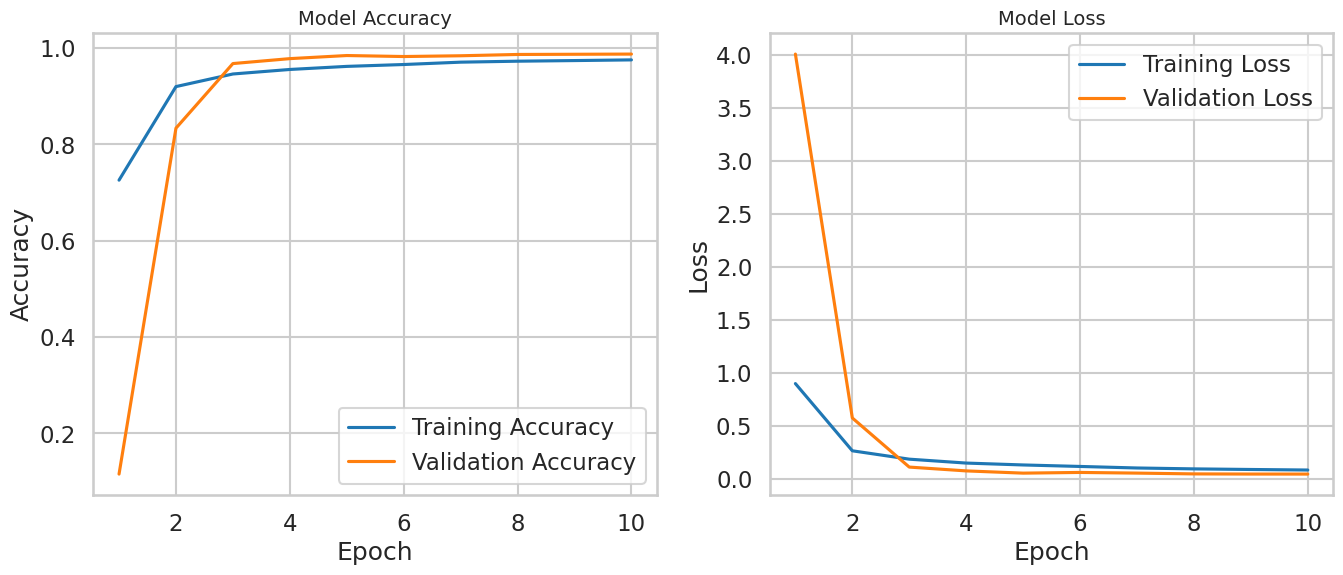

In [ ]:
sns.set_style('whitegrid')

# Create a larger figure
plt.figure(figsize=(16, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), y_pred.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), y_pred.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), y_pred.history['loss'], label='Training Loss')
plt.plot(range(1, EPOCHS + 1), y_pred.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
# model loss and accuracy on validation set
model.evaluate(x_test, y_test, verbose=False)

[0.03530919551849365, 0.9885714054107666]

In [ ]:
# predicted values from model
y_pred_test = model.predict(x_test)

# actual data
y_actual = [np.argmax(i) for i in y_test]
# decoding predicted values
y_pred1 = [np.argmax(i) for i in y_pred_test]

394/394 [==============================] - 5s 12ms/step
[1.5691471e-06 1.4462735e-06 9.9998993e-01 4.6476821e-06 2.4872692e-08
 5.3880305e-09 1.9791028e-07 1.9799459e-06 6.6939513e-08 1.3418042e-08]
2


In [ ]:
print(classification_report(y_actual, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1167
           1       0.99      1.00      0.99      1411
           2       0.98      0.99      0.98      1323
           3       0.99      0.98      0.99      1308
           4       0.99      0.99      0.99      1203
           5       0.99      1.00      0.99      1148
           6       0.99      0.99      0.99      1241
           7       0.98      0.99      0.98      1299
           8       0.99      0.98      0.99      1224
           9       0.99      0.98      0.99      1276

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



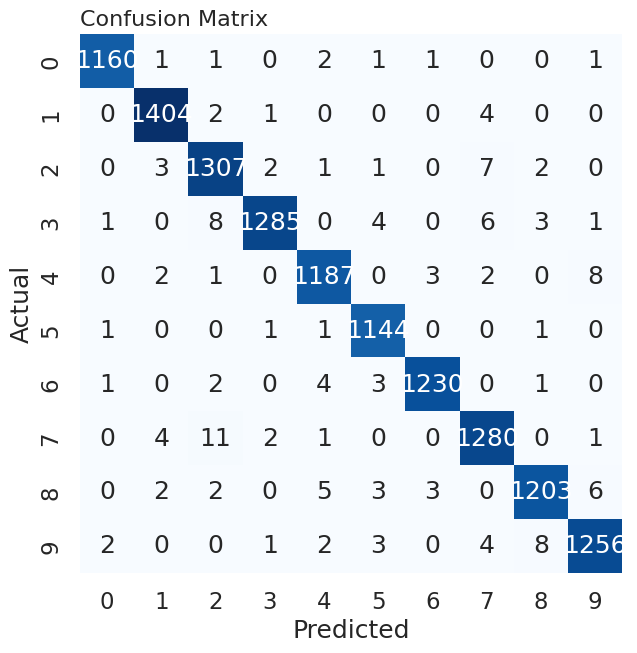

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_actual, y_pred1), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
! gdown --id 1YFd-Sp-DjR2DrQvG-m-f2pgJyImmMzMn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YFd-Sp-DjR2DrQvG-m-f2pgJyImmMzMn
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 102MB/s] 


In [ ]:
df1=pd.read_csv("/content/test.csv")

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
x_test1=df1.iloc[:,1:].to_numpy()
y_test1=df["label"].to_numpy()
# Normalize the Data
sx_test1=x/255.0

In [ ]:
sx_test1 = sx_test1.reshape(-1,28,28,1)

In [ ]:
y_test_cat = to_categorical(y_test1, num_classes = 10)

In [ ]:
# predicted values from model
y_pred_test1 = model.predict(sx_test1)
# actual data
y_actual_test = [np.argmax(i) for i in y_test_cat]
# decoding predicted values
y_pred_test2 = [np.argmax(i) for i in y_pred_test1]

1313/1313 [==============================] - 14s 11ms/step
[1.9094355e-06 9.9998492e-01 2.8557556e-06 1.2043894e-07 8.0365055e-07
 7.0366167e-07 3.5717851e-06 3.9241149e-06 9.4459205e-07 1.3408336e-07]
1


In [ ]:
print(classification_report(y_actual_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4132
           1       0.99      1.00      1.00      4684
           2       0.98      0.99      0.99      4177
           3       1.00      0.99      0.99      4351
           4       0.99      0.99      0.99      4072
           5       0.99      1.00      0.99      3795
           6       1.00      0.99      0.99      4137
           7       0.99      0.99      0.99      4401
           8       0.99      0.99      0.99      4063
           9       0.99      0.98      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000



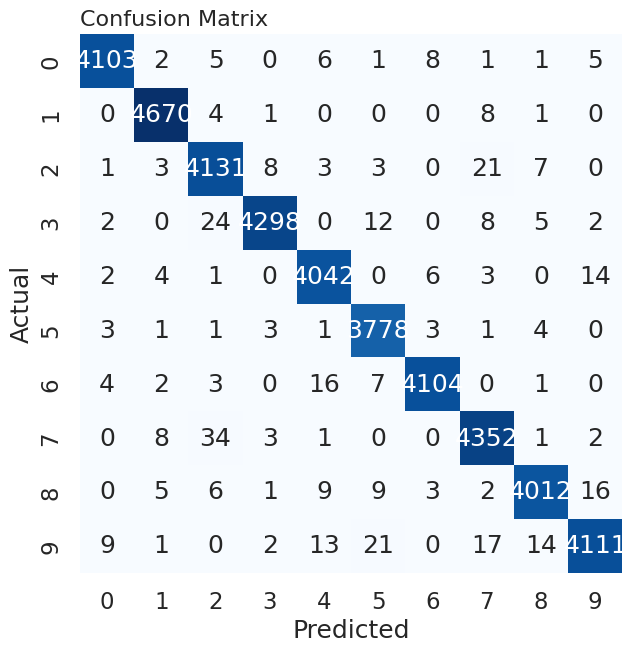

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_actual_test, y_pred_test2), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()